<a href="https://colab.research.google.com/github/fahrulrozi11/Machine-Learning/blob/main/Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#End-to-end Machine Learning project


#SET UP

In [5]:
import sys
import sklearn
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

# Validasi versi Python minimal 3.5 dan scikit-learn minimal 0.20
if sys.version_info < (3, 5):
    raise RuntimeError("Python 3.5+ is required")
if sklearn.__version__ < "0.20":
    raise RuntimeError("scikit-learn version 0.20+ is required")

# Konfigurasi matplotlib untuk tampil lebih rapi
mpl.rcParams.update({
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "figure.figsize": (8, 5)
})

# Lokasi penyimpanan gambar yang otomatis dibuat jika belum ada
BASE_DIR = "."
PROJECT_NAME = "end_to_end_project"
IMG_DIR = os.path.join(BASE_DIR, "images", PROJECT_NAME)
os.makedirs(IMG_DIR, exist_ok=True)

def save_figure(filename, tight_layout=True, ext="png", dpi=300):
    full_path = os.path.join(IMG_DIR, f"{filename}.{ext}")
    print(f"Saving figure {filename} to {full_path}")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(full_path, dpi=dpi, format=ext)


#Get Data

In [6]:
# prompt: get data DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"

import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  """Fetches the housing dataset from a given URL, extracts it, and stores it locally."""
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

fetch_housing_data()
print("Data fetched successfully!")

Data fetched successfully!


In [7]:
import pandas as pd
import os

# Define the path to your housing data.
# You can adjust this path based on where your housing.csv file is located.
# For example, if it's in a 'datasets/housing' directory, you could use:
# HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_PATH = "/content/datasets/housing" # Assuming the fetch_housing_data function was run and created this path

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [8]:
# prompt: Take a Quick Look at the Data Structure

import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

housing = load_housing_data()
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
fetch_housing_data()

In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


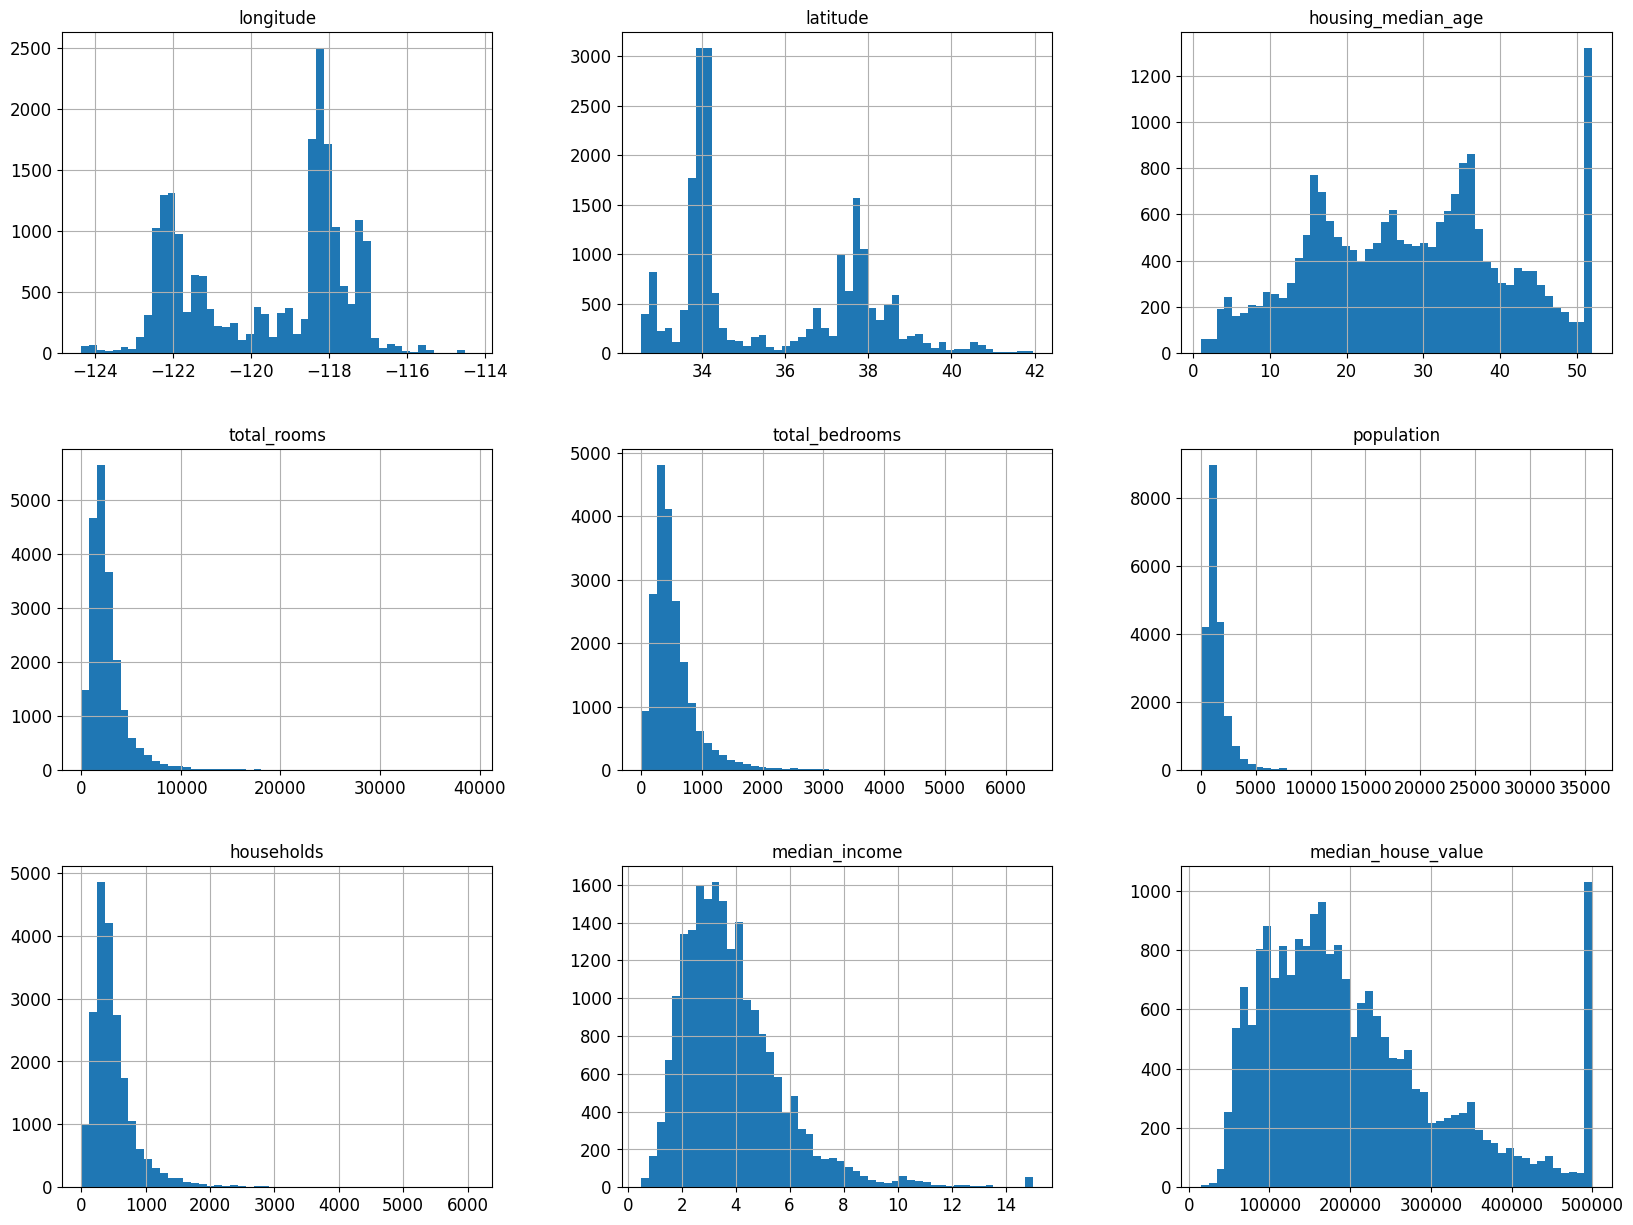

In [ ]:
# prompt: housing.hist(bins=50, figsize=(20,15))

housing.hist(bins=50, figsize=(20,15))
plt.show()

# Create a Test Set

In [ ]:
np.random.seed(42)

In [ ]:
# prompt: # For illustration only. Sklearn has train_test_split()

# divide into train and test sets
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
print(f"Number of training samples: {len(train_set)}")
print(f"Number of testing samples: {len(test_set)}")

Number of training samples: 16512
Number of testing samples: 4128


In [ ]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [ ]:
len(test_set)

4128

In [13]:
from zlib import crc32
import numpy as np

def is_in_test_set(identifier, test_ratio):
    """Cek apakah sebuah id masuk ke dalam test set berdasarkan nilai hash-nya"""
    hashed_value = crc32(np.int64(identifier)) & 0xffffffff
    threshold = test_ratio * 2**32
    return hashed_value < threshold

def split_train_test_by_id(df, test_ratio, id_column):
    """
    Membagi data menjadi train dan test set berdasarkan ID unik pada kolom id_column.
    Pengelompokan berdasarkan hash memastikan data dengan id yang sama selalu masuk ke set yang
    sama.
    """
    ids = df[id_column]
    test_mask = ids.apply(lambda id_val: is_in_test_set(id_val, test_ratio))
    train_set = df.loc[~test_mask].copy()
    test_set = df.loc[test_mask].copy()
    return train_set, test_set


In [14]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [ ]:
# prompt: implementation that supports any hash function and is compatible with both Python 2 and Python 3

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    # Use the provided hash function's digest method and compare the last byte
    in_test_set = ids.apply(lambda id_: hash(np.int64(id_)).digest()[-1] < 256 * test_ratio)
    return data.loc[~in_test_set], data.loc[in_test_set]

In [15]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [16]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [ ]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20512,-121.55,38.59,36.0,435.0,95.0,285.0,90.0,1.2292,69600.0,INLAND
15568,-117.04,33.09,16.0,4677.0,581.0,1902.0,566.0,6.1834,335600.0,<1H OCEAN
4047,-118.51,34.14,28.0,6748.0,904.0,2431.0,876.0,12.8879,500001.0,<1H OCEAN
18127,-122.02,37.34,30.0,1036.0,151.0,467.0,156.0,6.4480,360600.0,<1H OCEAN
3548,-118.61,34.25,16.0,8295.0,1506.0,3903.0,1451.0,5.5111,276600.0,<1H OCEAN


In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [18]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


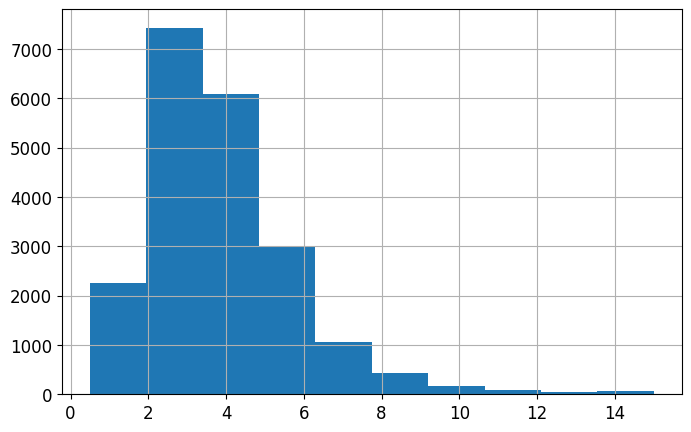

In [19]:
# prompt: median income histogram

housing["median_income"].hist()
plt.show()

In [2]:
import pandas as pd
import os

# Define the path to your housing data.
# Replace '/path/to/your/housing/data' with the actual path.
HOUSING_PATH = "/content/" # Assuming the file is in the default Colab content directory

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# Example usage:
# housing_data = load_housing_data()
# display(housing_data.head())

In [20]:
# Membagi kolom median_income ke dalam beberapa kategori pendapatan dengan label numerik
income_bins = [0.0, 1.5, 3.0, 4.5, 6.0, float("inf")]
income_labels = [1, 2, 3, 4, 5]

housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=income_bins,
    labels=income_labels,
    include_lowest=True
)


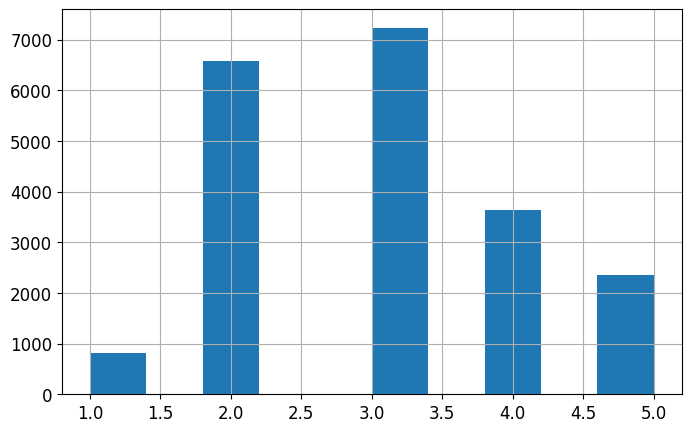

In [21]:
# prompt: histogram income cat

housing["income_cat"].hist()
plt.show()

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [24]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)


,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [25]:
housing["income_cat"].value_counts() / len(housing)

,count
income_cat,
3,0.350581
2,0.318847
4,0.176308
5,0.114438
1,0.039826


In [26]:
def calculate_income_cat_proportions(df):
    """Menghitung proporsi masing-masing kategori income_cat pada DataFrame"""
    return df["income_cat"].value_counts(normalize=True)

# Membagi data housing menjadi train dan test set secara acak
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# Membuat DataFrame perbandingan proporsi kategori income_cat di beberapa set data
compare_props = pd.DataFrame({
    "Overall": calculate_income_cat_proportions(housing),
    "Stratified": calculate_income_cat_proportions(strat_test_set),  # stratified test set harus sudah ada
    "Random": calculate_income_cat_proportions(test_set),
}).sort_index()

# Menghitung persentase error relatif antara random dan stratified dibandingkan overall
compare_props["Random % Error"] = 100 * (compare_props["Random"] / compare_props["Overall"] - 1)
compare_props["Stratified % Error"] = 100 * (compare_props["Stratified"] / compare_props["Overall"] - 1)


In [27]:
compare_props

,Overall,Stratified,Random,Random % Error,Stratified % Error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [28]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

In [29]:
housing = strat_train_set.copy()

In [33]:
import matplotlib.pyplot as plt
import os

# Define a function to save figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure bad_visualization_plot


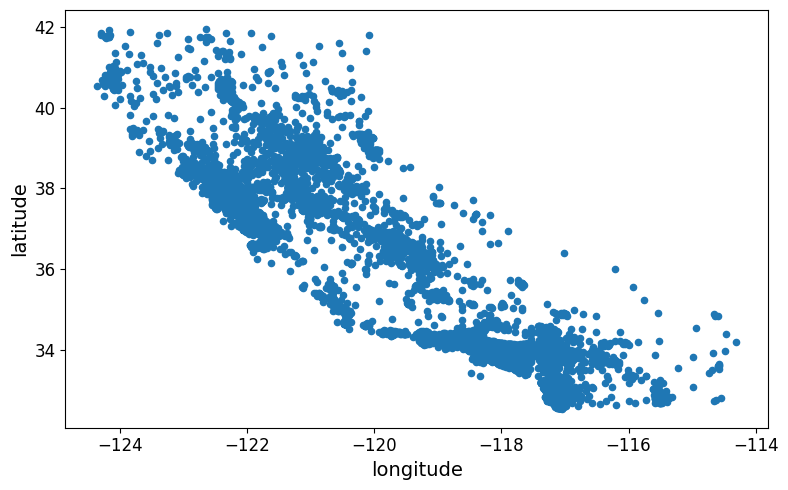

In [34]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


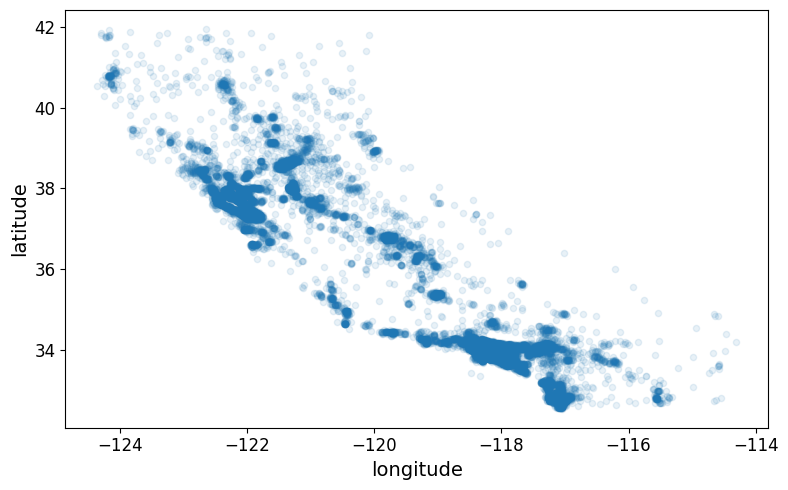

In [35]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

Saving figure housing_prices_scatterplot


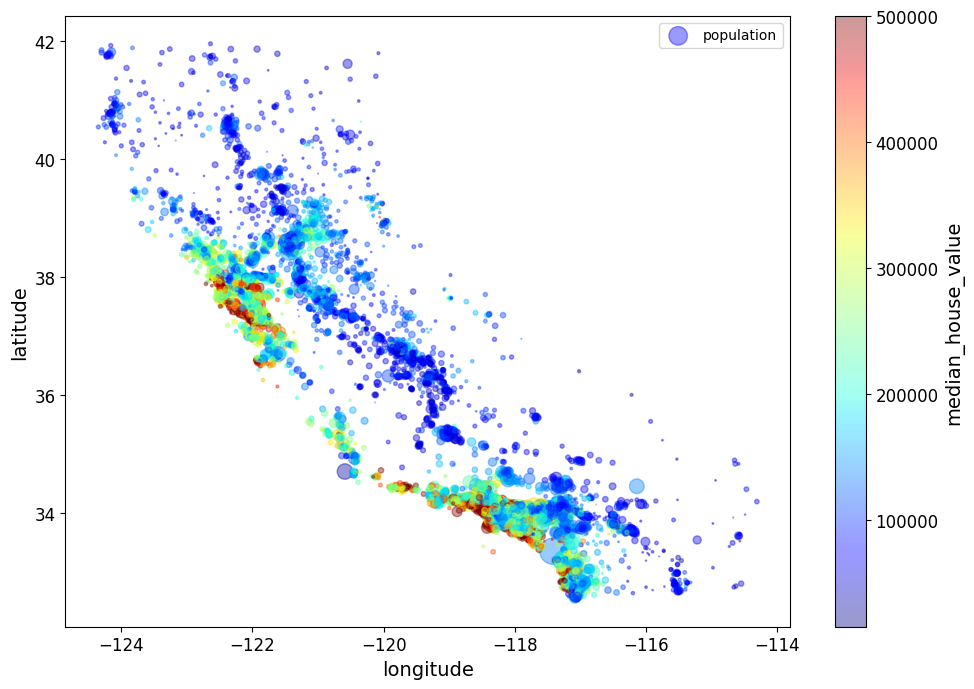

In [36]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [37]:
import os
import urllib.request

# Tentukan direktori penyimpanan gambar relatif terhadap root proyek
images_dir = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_dir, exist_ok=True)  # Buat folder jika belum ada

# URL sumber dan nama file gambar
base_url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/images/end_to_end_project/"
file_name = "california.png"

print(f"Memulai download file {file_name}...")

# Lokasi file tujuan
destination = os.path.join(images_dir, file_name)

# Download file dari URL
urllib.request.urlretrieve(base_url + file_name, destination)

print(f"File {file_name} berhasil di-download ke {destination}")


Memulai download file california.png...
File california.png berhasil di-download ke ./images/end_to_end_project/california.png


Saving figure california_housing_prices_plot


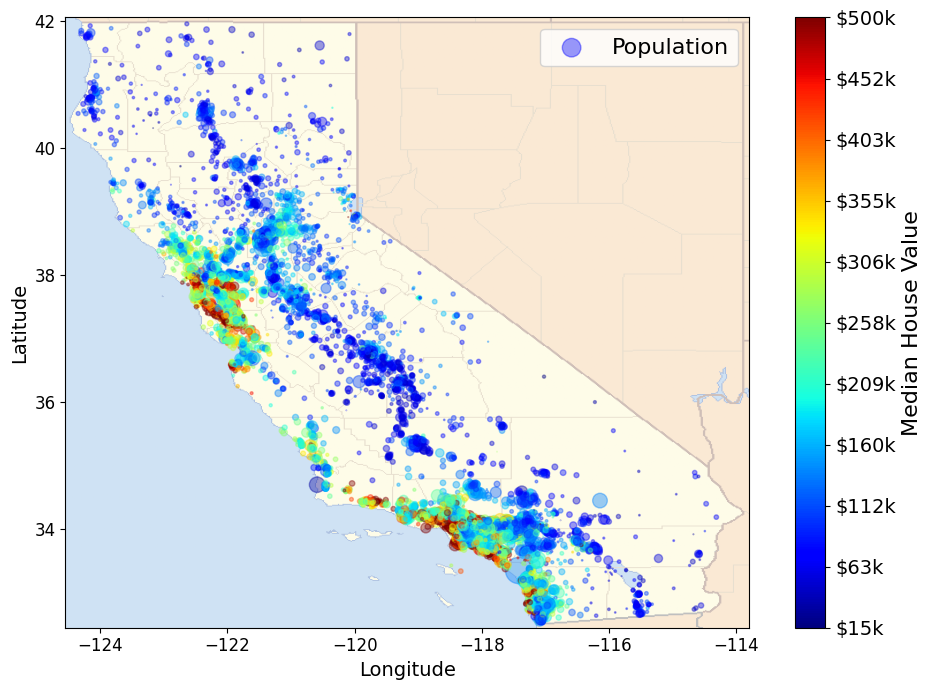

In [40]:
import matplotlib.image as mpimg
import numpy as np # Import numpy
import matplotlib.pyplot as plt # Import matplotlib.pyplot if not already imported in this cell

# Ensure IMAGES_PATH and file_name are defined (assuming they were defined in previous cells)
# If not, you would need to define them here or run the cells that define them.
# From inspecting the notebook state, IMAGES_PATH is defined in JE6a3Z-0dEeK
# and file_name is defined in dWKkV5irduKD.

# Correct variable names
california_img = mpimg.imread(os.path.join(IMAGES_PATH, file_name))

ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet")) # Use the same cmap as the scatter plot for consistency
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
# Calculate tick values based on the actual price range
tick_values = np.linspace(prices.min(), prices.max(), 11)

# Create a scalar mappable object for the colorbar
sm = plt.cm.ScalarMappable(cmap=plt.get_cmap("jet"), norm=plt.Normalize(vmin=prices.min(), vmax=prices.max()))
sm.set_array([]) # Needed for the colorbar to work correctly

# Create the colorbar using the scalar mappable object, explicitly passing the axes
cbar = plt.colorbar(sm, ticks=tick_values, ax=ax)
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

#Looking for Correlations


In [41]:
corr_matrix = housing.drop("ocean_proximity", axis=1).corr()

In [42]:
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687151
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population,-0.026882
longitude,-0.047466
latitude,-0.142673


Saving figure scatter_matrix_plot


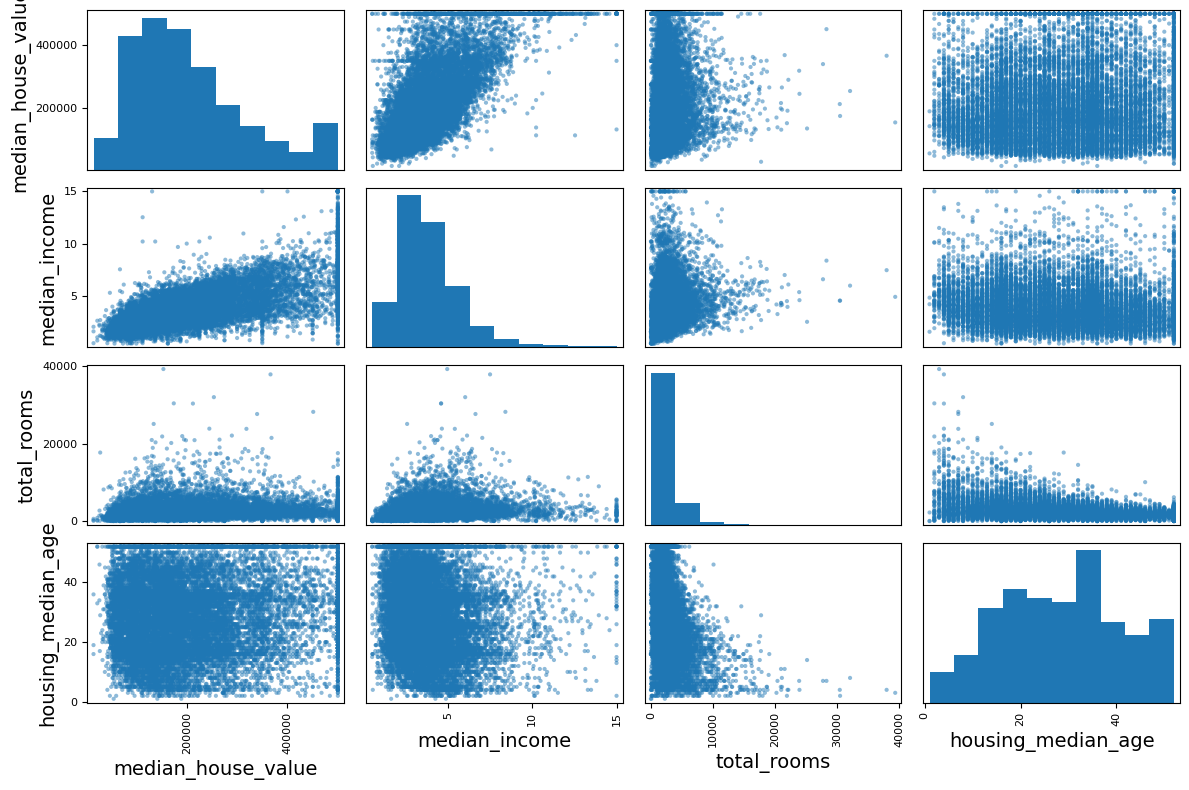

In [43]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


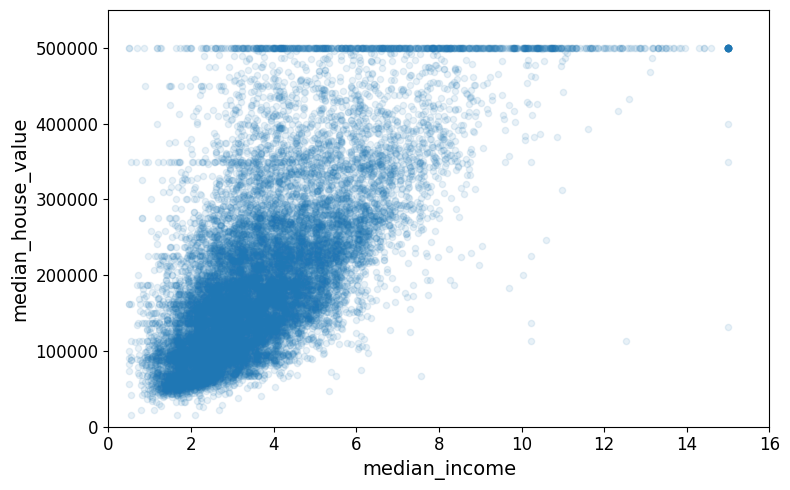

In [44]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

#Experimenting with Attribute Combinations


In [45]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [46]:
corr_matrix = housing.drop("ocean_proximity", axis=1).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687151
rooms_per_household,0.146255
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population_per_household,-0.021991
population,-0.026882
longitude,-0.047466


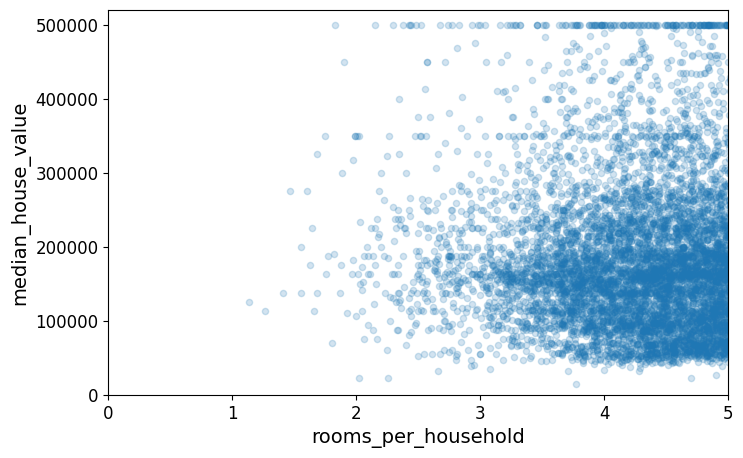

In [47]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

# Prepare the Data for Machine Learning Algorithms

In [49]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


#Data Cleaning

In [51]:
housing.dropna(subset=["total_bedrooms"])    # option 1
housing.drop("total_bedrooms", axis=1)       # option 2
median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

<ipython-input-51-622061349>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace=True)


In [53]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [54]:
# prompt: option 1

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
imputer.statistics_
housing_num.median().values
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)
housing_tr.loc[sample_incomplete_rows.index.values]
imputer.strategy
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)
housing_tr.head()
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [57]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [58]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity


In [59]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

<ipython-input-59-760120979>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3


In [60]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [61]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [62]:
housing_num = housing.drop("ocean_proximity", axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [63]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [64]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [65]:
X = imputer.transform(housing_num)

In [66]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [67]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['longitude']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'longitude'}, axis=1)
              .sort_values('longitude', ascending=True))
  xs = counted['longitude']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('longitude', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('longitude')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['latitude']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'latitude'}, axis=1)
              .sort_values('latitude', ascending=True))
  xs = counted['latitude']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('latitude', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('latitude')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['housing_median_age']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'housing_median_age'}, axis=1)
              .sort_values('housing_median_age', ascending=True))
  xs = counted['housing_median_age']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('housing_median_age', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('housing_median_age')
_ = plt.ylabel('count()')

In [69]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [70]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


#Handling Text and Categorical Attributes

In [72]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)


,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [73]:
>>> from sklearn.preprocessing import OrdinalEncoder
>>> ordinal_encoder = OrdinalEncoder()
>>> housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
>>> housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [80]:
# ordinal_encoder.categories_
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [81]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [82]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [83]:
cat_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#Custom Transformers

In [84]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

#Feature Scaling

In [85]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Example of MinMaxScaler
scaler_minmax = MinMaxScaler()
housing_scaled_minmax = scaler_minmax.fit_transform(housing_num) # Apply to numerical features

# Example of StandardScaler
scaler_standard = StandardScaler()
housing_scaled_standard = scaler_standard.fit_transform(housing_num) # Apply to numerical features

# Display the first few rows of scaled data (as NumPy arrays)
print("Scaled data using MinMaxScaler:")
print(housing_scaled_minmax[:5])

print("\nScaled data using StandardScaler:")
print(housing_scaled_standard[:5])

# You can convert the scaled arrays back to DataFrames if needed
housing_scaled_minmax_df = pd.DataFrame(housing_scaled_minmax, columns=housing_num.columns, index=housing_num.index)
housing_scaled_standard_df = pd.DataFrame(housing_scaled_standard, columns=housing_num.columns, index=housing_num.index)

print("\nScaled DataFrame using MinMaxScaler:")
print(housing_scaled_minmax_df.head())

print("\nScaled DataFrame using StandardScaler:")
print(housing_scaled_standard_df.head())

Scaled data using MinMaxScaler:
[[0.28784861 0.63549416 0.54901961 0.09836191 0.12806057 0.06261386
  0.13144137 0.11542599]
 [0.70916335 0.05844846 0.11764706 0.13516813 0.13740335 0.05639172
  0.14301718 0.40257376]
 [0.52888446 0.30074389 0.84313725 0.0410032  0.0496134  0.01861039
  0.05563854 0.16379774]
 [0.71912351 0.02231668 0.45098039 0.04759119 0.08327964 0.02508478
  0.08980583 0.11906732]
 [0.562749   0.18490967 0.50980392 0.0897899  0.10373711 0.05140279
  0.10791636 0.27561689]]

Scaled data using StandardScaler:
[[-0.94135046  1.34743822  0.02756357  0.58477745  0.64037127  0.73260236
   0.55628602 -0.8936472 ]
 [ 1.17178212 -1.19243966 -1.72201763  1.26146668  0.78156132  0.53361152
   0.72131799  1.292168  ]
 [ 0.26758118 -0.1259716   1.22045984 -0.46977281 -0.54513828 -0.67467519
  -0.52440722 -0.52543365]
 [ 1.22173797 -1.35147437 -0.37006852 -0.34865152 -0.03636724 -0.46761716
  -0.03729672 -0.86592882]
 [ 0.43743108 -0.63581817 -0.13148926  0.42717947  0.27279028  

#Transformation Pipelines


In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])
housing_num_tr = num_pipeline.fit_transform(housing_num)


In [87]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [90]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])
housing_prepared = full_pipeline.fit_transform(housing)

In [91]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [92]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [93]:
housing_prepared.shape

(16512, 16)

#Select and Train a Model

#Training and Evaluating on the Training Set

In [94]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression()

In [98]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [99]:
>>> from sklearn.metrics import mean_squared_error
>>> housing_predictions = lin_reg.predict(housing_prepared)
>>> lin_mse = mean_squared_error(housing_labels, housing_predictions)
>>> lin_rmse = np.sqrt(lin_mse)
>>> lin_rmse

np.float64(68627.87390018745)

In [100]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [101]:
>>> housing_predictions = tree_reg.predict(housing_prepared)
>>> tree_mse = mean_squared_error(housing_labels, housing_predictions)
>>> tree_rmse = np.sqrt(tree_mse)
>>> tree_rmse


np.float64(0.0)

#Better Evaluation Using Cross-Validation

In [105]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
 scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [106]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72183.76950162 70249.52608333 67166.87398681 72311.5685783
 69732.74111521 75883.55446559 72799.81200049 73091.96059412
 68410.92503484 70490.20839279]
Mean: 71232.09397531104
Standard deviation: 2405.676218640336


In [107]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180694


In [108]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [109]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

np.float64(18650.698705770003)

#Fine-Tune Your Model

#Grid Search

In [110]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [111]:
grid_search.best_params_


{'max_features': 8, 'n_estimators': 30}

In [112]:
grid_search.best_estimator_


RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [118]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

#Randomized Search

In [119]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79d881fc9dd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79d87f856ad0>},
                   random_state=42, scoring='neg_mean_squared_error')

#Ensemble Methods


#Analyze the Best Models and Their Errors


In [120]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

In [121]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(np.float64(0.3790092248170967), 'median_income'),
 (np.float64(0.16570630316895876), 'INLAND'),
 (np.float64(0.10703132208204354), 'pop_per_hhold'),
 (np.float64(0.06965425227942929), 'longitude'),
 (np.float64(0.0604213840080722), 'latitude'),
 (np.float64(0.054778915018283726), 'rooms_per_hhold'),
 (np.float64(0.048203121338269206), 'bedrooms_per_room'),
 (np.float64(0.04218822024391753), 'housing_median_age'),
 (np.float64(0.015849114744428634), 'population'),
 (np.float64(0.015554529490469328), 'total_bedrooms'),
 (np.float64(0.01524505568840977), 'total_rooms'),
 (np.float64(0.014934655161887776), 'households'),
 (np.float64(0.006792660074259966), '<1H OCEAN'),
 (np.float64(0.0030281610628962747), 'NEAR OCEAN'),
 (np.float64(0.0015247327555504937), 'NEAR BAY'),
 (np.float64(7.834806602687504e-05), 'ISLAND')]

#Evaluate Your System on the Test Set

In [122]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [123]:
final_rmse

np.float64(47873.26095812988)

In [129]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45893.36082829, 49774.46796717])

#Exercises

```
`# This is formatted as code`
```



1. Try a Support Vector Machine regressor (sklearn.svm.SVR) with various hyper‐
parameters, such as kernel="linear" (with various values for the C hyperpara‐
meter) or kernel="rbf" (with various values for the C and gamma
hyperparameters). Don’t worry about what these hyperparameters mean for now.
How does the best SVR predictor perform?
2. Try replacing GridSearchCV with RandomizedSearchCV.
3. Try adding a transformer in the preparation pipeline to select only the most
important attributes.
4. Try creating a single pipeline that does the full data preparation plus the final
prediction.
5. Automatically explore some preparation options using GridSearchCV.


#Exercises Solution

# IZIN KAK, LAPTOPNYA GA KUAT JADI SAYA PASANG KODENYA SAJA TIDAK DI RUN, MOHON MAAF ATAS KEKENTANGAN LAPTOP SAYA

1

In [131]:

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.]},
    {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.],
     'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
]

svr_reg = SVR()
grid_search_svr = GridSearchCV(svr_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           verbose=2) # Set verbose to 2 to see progress

grid_search_svr.fit(housing_prepared, housing_labels)

print("Best parameters for SVR:", grid_search_svr.best_params_)
print("Best estimator for SVR:", grid_search_svr.best_estimator_)

svr_cvres = grid_search_svr.cv_results_
for mean_score, params in zip(svr_cvres["mean_test_score"], svr_cvres["params"]):
    print(np.sqrt(-mean_score), params)

# Evaluate the best SVR model on the test set
best_svr = grid_search_svr.best_estimator_
final_predictions_svr = best_svr.predict(X_test_prepared)
final_mse_svr = mean_squared_error(y_test, final_predictions_svr)
final_rmse_svr = np.sqrt(final_mse_svr)
print("\nRMSE of the best SVR on the test set:", final_rmse_svr)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=  26.3s
[CV] END ..............................C=10.0, kernel=linear; total time=  10.4s
[CV] END ..............................C=10.0, kernel=linear; total time=  10.7s


KeyboardInterrupt: 

2

In [ ]:


from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

# Display results from Randomized Search
print("Best parameters from Randomized Search:", rnd_search.best_params_)
print("Best estimator from Randomized Search:", rnd_search.best_estimator_)

cvres_rnd = rnd_search.cv_results_
for mean_score, params in zip(cvres_rnd["mean_test_score"], cvres_rnd["params"]):
  print(np.sqrt(-mean_score), params)


3

In [132]:


# Custom Transformer to select attributes
class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, n_features):
        self.feature_importances = feature_importances
        self.n_features = n_features

    def fit(self, X, y=None):
        # Get the indices of the top n_features
        self.feature_indices_ = np.argsort(self.feature_importances)[::-1][:self.n_features]
        return self

    def transform(self, X):
        # Select the top features based on their indices
        return X[:, self.feature_indices_]

# Assuming you have already computed feature_importances from a trained model
# For example, using the best RandomForestRegressor from a previous step:
# feature_importances = grid_search.best_estimator_.feature_importances_
# Let's use the feature importances from the previously trained RandomForestRegressor
# (assuming grid_search was run and feature_importances is available)

# Define the number of top features to select
n_top_features = 15 # You can choose a different number based on your analysis

# Create the TopFeatureSelector transformer
# Ensure 'feature_importances' variable is available from your trained model (e.g., grid_search.best_estimator_.feature_importances_)
# If not, you would need to train a model first to get feature importances.
# For the purpose of this example, let's assume feature_importances is available.
# If not, run the cell where feature_importances is calculated.
# Assuming feature_importances is already computed:

# Recreate the numerical and categorical attribute lists
num_attribs = list(housing.drop("ocean_proximity", axis=1).columns) # Ensure this correctly gets numerical column names
cat_attribs = ["ocean_proximity"]

# Create the numerical pipeline with the attribute adder and standard scaler
# Note: The imputer and attribs_adder are applied before feature selection
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    # The StandardScaler should ideally be applied AFTER feature selection
    # Or applied to the selected numerical features
    # Let's adjust the pipeline structure
])

# Combine the numerical and categorical pipelines in a ColumnTransformer
# The feature selection will happen *after* this preprocessor
preprocessing_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

# Fit the preprocessing pipeline to get the processed training data
housing_prepared_initial = preprocessing_pipeline.fit_transform(housing)

# Now, let's get the feature importances based on the features *after* initial preprocessing
# We need to map the original feature importances (from the raw data) to the new features
# created by the preprocessing pipeline. This can be tricky.

# A simpler approach for demonstrating the TopFeatureSelector is to apply it *after* the full preprocessing
# and before the final model. However, feature importances are typically calculated
# *after* fitting a model. So, you would usually fit a model (like RandomForest), get importances,
# then create a new pipeline that includes the selector based on those importances.

# Let's create a pipeline that includes the preprocessing, feature selection, and the model.
# We need a way to get feature importances *within* the pipeline or pass them in.

# A common pattern is to use a RandomForestRegressor to estimate importances
# and then use a SelectFromModel transformer.

from sklearn.feature_selection import SelectFromModel

# Let's redefine the full pipeline to include preprocessing and a temporary model
# to get feature importances. This is often done in a two-step process:
# 1. Train a model on the preprocessed data to get importances.
# 2. Build a final pipeline that uses SelectFromModel based on those importances.

# Step 1: Train a temporary model to get feature importances
# First, ensure `housing_prepared` and `housing_labels` are available from previous steps
# If not, run the necessary cells to create them:
# housing = strat_train_set.drop("median_house_value", axis=1)
# housing_labels = strat_train_set["median_house_value"].copy()
# num_attribs = list(housing.drop("ocean_proximity", axis=1).columns)
# cat_attribs = ["ocean_proximity"]
# num_pipeline = Pipeline([
#  ('imputer', SimpleImputer(strategy="median")),
#  ('attribs_adder', CombinedAttributesAdder()),
#  ('std_scaler', StandardScaler()),
#  ])
# full_pipeline = ColumnTransformer([
#  ("num", num_pipeline, num_attribs),
#  ("cat", OneHotEncoder(), cat_attribs),
#  ])
# housing_prepared = full_pipeline.fit_transform(housing)

# Now, fit a model to get importances
forest_reg_temp = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg_temp.fit(housing_prepared, housing_labels)
feature_importances_temp = forest_reg_temp.feature_importances_

# Step 2: Create a pipeline including feature selection using SelectFromModel

# We need to adjust the preprocessing pipeline so that the StandardScaler is applied *after* SelectFromModel
# or the SelectFromModel is applied *after* scaling (depending on the desired effect).
# Applying SelectFromModel *after* scaling might be more robust if features are on different scales.

# Let's create a pipeline that first preprocesses, then selects features, then scales the numerical part again (if necessary).
# Or, modify the initial preprocessing pipeline to output separate numerical and categorical outputs
# so we can apply feature selection specifically to the numerical features.

# Let's modify the ColumnTransformer to use passthrough for columns not selected.
# This requires SelectFromModel to operate on the combined numerical and one-hot encoded categorical features.

# Redefine the full pipeline to include SelectFromModel
# SelectFromModel will automatically select features based on the feature_importances_ of the estimator.
# It needs an estimator to be trained on the data first.

# Let's create a pipeline with preprocessing, then SelectFromModel, then the final model.
# We can pass the pre-calculated feature importances to SelectFromModel if we don't want it to refit an estimator.

# The `threshold` parameter of `SelectFromModel` can be set to 'median' or a specific value.
# Let's try selecting features with importance greater than the median importance.

# First, ensure housing_prepared is available.
# If not, run the cells up to the creation of housing_prepared.

# Use SelectFromModel with a threshold based on feature importances
# You can choose a threshold, e.g., 'median' or a specific value like 0.01
selector = SelectFromModel(estimator=forest_reg_temp, threshold='median', prefit=True) # Use prefit=True because forest_reg_temp is already fitted

# Now, build a final pipeline with preprocessing, selection, and the model
# Note: If using SelectFromModel on the combined data, the categorical features are already one-hot encoded.
# The standard scaling in num_pipeline is applied to the numerical features *before* they are combined
# with the categorical features. If you want to scale the selected numerical features again after selection,
# you might need a more complex pipeline structure or apply scaling separately.

# A more common approach is to apply SelectFromModel within a pipeline *after* the initial preprocessing
# and *before* the final model.

# Let's redefine the pipeline to include preprocessing, then feature selection, then the final model.

# Redefine the numerical pipeline without final scaling yet
num_pipeline_basic = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
])

# Redefine the full preprocessing pipeline
full_preprocessing = ColumnTransformer([
    ("num", num_pipeline_basic, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

# Fit the preprocessing pipeline to get the initial features for feature selection
housing_prepared_for_selection = full_preprocessing.fit_transform(housing)

# Now, fit a temporary model on these initial features to get importances
forest_reg_for_selection = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg_for_selection.fit(housing_prepared_for_selection, housing_labels)
feature_importances_for_selection = forest_reg_for_selection.feature_importances_

# Create the feature selector using SelectFromModel based on the calculated importances
# Use 'median' as the threshold for demonstration, or a specific number of features
# selector = SelectFromModel(estimator=forest_reg_for_selection, threshold='median', prefit=True) # Or threshold=0.01 or max_features=n_top_features
selector = SelectFromModel(estimator=forest_reg_for_selection, max_features=n_top_features, prefit=True)


# Now, build the final pipeline: preprocessing -> feature selection -> final model (with scaling)

# Since SelectFromModel selects columns based on index *after* the initial preprocessing,
# we need to adjust the numerical scaling.

# Let's create a pipeline that first preprocesses everything, then selects features,
# then applies a scaler *only* to the selected numerical features if needed.
# However, SelectFromModel outputs a single array, making it hard to separate numerical/categorical later.

# A better way is to integrate feature selection into the ColumnTransformer or apply it to specific columns.
# Or, define feature importances per original column type and select separately.

# Let's refine the approach:
# 1. Preprocess numerical and categorical features separately up to a point where they can be combined.
# 2. Combine them.
# 3. Apply SelectFromModel to the combined features.
# 4. Apply final scaling (if desired) to the selected features.
# 5. Train the final model.

# Let's go back to the `full_pipeline` concept and add `SelectFromModel` after it.

# Redefine the full preprocessing pipeline including scaling
num_pipeline_scaled = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()), # Scale numerical features
])

full_pipeline_preselector = ColumnTransformer([
    ("num", num_pipeline_scaled, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

# Fit this pipeline to get the features before selection
housing_prepared_preselector = full_pipeline_preselector.fit_transform(housing)

# Now, fit a temporary model on these fully preprocessed features to get importances
# (This might be slightly redundant if using a simple selector, but good practice if the estimator is complex)
forest_reg_preselector = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg_preselector.fit(housing_prepared_preselector, housing_labels)
feature_importances_preselector = forest_reg_preselector.feature_importances_

# Create the feature selector using SelectFromModel based on the calculated importances
selector_final = SelectFromModel(estimator=forest_reg_preselector, max_features=n_top_features, prefit=True)


# Now, build the final pipeline: full preprocessing -> feature selection -> final model
final_pipeline_with_selector = Pipeline([
    ('preprocessing', full_pipeline_preselector), # Apply all preprocessing
    ('feature_selection', selector_final),        # Select top features
    ('model', RandomForestRegressor(n_estimators=100, random_state=42)) # Final model (using default params for demonstration)
])

# Train the final pipeline
final_pipeline_with_selector.fit(housing, housing_labels)

# Evaluate the final pipeline on the test set
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions_with_selector = final_pipeline_with_selector.predict(X_test)

final_mse_with_selector = mean_squared_error(y_test, final_predictions_with_selector)
final_rmse_with_selector = np.sqrt(final_mse_with_selector)
print("\nRMSE of the final model with feature selection on the test set:", final_rmse_with_selector)

# You can also inspect the selected features (indices)
selected_feature_indices = final_pipeline_with_selector.named_steps['feature_selection'].get_support(indices=True)
print("\nIndices of selected features (after preprocessing):", selected_feature_indices)

# Mapping these indices back to meaningful feature names (original or combined) requires careful tracking
# of the ColumnTransformer output and CombinedAttributesAdder output.
# The order of features after full_pipeline_preselector is num_attribs (scaled) + extra_attribs (scaled) + cat_one_hot_attribs.
# Let's reconstruct the feature names after initial preprocessing:
extra_attribs_names = ["rooms_per_hhold", "pop_per_hhold"]
# Check if bedrooms_per_room was added based on CombinedAttributesAdder's __init__
# By default, add_bedrooms_per_room=True for CombinedAttributesAdder in the num_pipeline
attribs_adder_in_pipeline = final_pipeline_with_selector.named_steps['preprocessing'].named_transformers_['num'].named_steps['attribs_adder']
if attribs_adder_in_pipeline.add_bedrooms_per_room:
    extra_attribs_names.append("bedrooms_per_room")

cat_encoder_in_pipeline = final_pipeline_with_selector.named_steps['preprocessing'].named_transformers_['cat']
cat_one_hot_attribs_names = list(cat_encoder_in_pipeline.categories_[0])

all_features_after_preprocessing = num_attribs + extra_attribs_names + cat_one_hot_attribs_names

print("\nNames of all features after preprocessing:", all_features_after_preprocessing)
print("\nNames of selected features:", [all_features_after_preprocessing[i] for i in selected_feature_indices])



RMSE of the final model with feature selection on the test set: 68136.58510202053

Indices of selected features (after preprocessing): [ 7  9 12]

Names of all features after preprocessing: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

Names of selected features: ['median_income', 'pop_per_hhold', 'INLAND']


4

In [ ]:

# prediction.

# Redefine the numerical pipeline including scaling and attribute adding
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

# Define the full data preparation pipeline using ColumnTransformer
full_prep_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),  # Assuming num_attribs is defined
    ("cat", OneHotEncoder(), cat_attribs),  # Assuming cat_attribs is defined
])

# Create a single pipeline that includes preparation and prediction (Random Forest)
full_pipeline_and_model = Pipeline([
    ('preparation', full_prep_pipeline),  # Data preparation step
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)) # Final prediction model
])

# Train the single pipeline
# Assumes housing (features) and housing_labels (target) are already defined
full_pipeline_and_model.fit(housing, housing_labels)

# Evaluate the pipeline on the training data (for demonstration)
housing_predictions_pipeline = full_pipeline_and_model.predict(housing)
pipeline_mse = mean_squared_error(housing_labels, housing_predictions_pipeline)
pipeline_rmse = np.sqrt(pipeline_mse)
print("RMSE on training set using full pipeline:", pipeline_rmse)

# Evaluate the pipeline on the test set
X_test = strat_test_set.drop("median_house_value", axis=1) # Assumes strat_test_set is defined
y_test = strat_test_set["median_house_value"].copy()

final_predictions_pipeline = full_pipeline_and_model.predict(X_test)

final_mse_pipeline = mean_squared_error(y_test, final_predictions_pipeline)
final_rmse_pipeline = np.sqrt(final_mse_pipeline)
print("RMSE on test set using full pipeline:", final_rmse_pipeline)

# 5


# Define a range of hyperparameters for the preparation steps and the model
param_grid_full_pipeline = {
    'preparation__num__imputer__strategy': ['median', 'mean'], # Explore imputer strategy
    'preparation__num__attribs_adder__add_bedrooms_per_room': [True, False], # Explore adding bedrooms_per_room
    'random_forest__n_estimators': [50, 100, 150], # Explore n_estimators for RandomForest
    'random_forest__max_features': [4, 6, 8],     # Explore max_features for RandomForest
}

# Create the GridSearchCV object for the full pipeline
grid_search_full_pipeline = GridSearchCV(full_pipeline_and_model, param_grid_full_pipeline, cv=5,
                                         scoring='neg_mean_squared_error',
                                         return_train_score=True,
                                         verbose=2) # Set verbose to 2 to see progress

# Run the grid search
grid_search_full_pipeline.fit(housing, housing_labels)

# Display the best parameters found
print("\nBest parameters for the full pipeline:", grid_search_full_pipeline.best_params_)

# Display the best estimator (the best pipeline found)
best_full_pipeline = grid_search_full_pipeline.best_estimator_
print("\nBest estimator (full pipeline):\n", best_full_pipeline)

# Display the cross-validation results
cvres_full_pipeline = grid_search_full_pipeline.cv_results_
for mean_score, params in zip(cvres_full_pipeline["mean_test_score"], cvres_full_pipeline["params"]):
    print(np.sqrt(-mean_score), params)

# Evaluate the best full pipeline on the test set
final_predictions_best_pipeline = best_full_pipeline.predict(X_test)
final_mse_best_pipeline = mean_squared_error(y_test, final_predictions_best_pipeline)
final_rmse_best_pipeline = np.sqrt(final_mse_best_pipeline)
print("\nRMSE of the best full pipeline on the test set:", final_rmse_best_pipeline)


5

In [ ]:


# Define a range of hyperparameters for the preparation steps and the model
param_grid_full_pipeline = {
    'preparation__num__imputer__strategy': ['median', 'mean'], # Explore imputer strategy
    'preparation__num__attribs_adder__add_bedrooms_per_room': [True, False], # Explore adding bedrooms_per_room
    'random_forest__n_estimators': [50, 100, 150], # Explore n_estimators for RandomForest
    'random_forest__max_features': [4, 6, 8],     # Explore max_features for RandomForest
}

# Create the GridSearchCV object for the full pipeline
grid_search_full_pipeline = GridSearchCV(full_pipeline_and_model, param_grid_full_pipeline, cv=5,
                                         scoring='neg_mean_squared_error',
                                         return_train_score=True,
                                         verbose=2) # Set verbose to 2 to see progress

# Run the grid search
grid_search_full_pipeline.fit(housing, housing_labels)

# Display the best parameters found
print("\nBest parameters for the full pipeline:", grid_search_full_pipeline.best_params_)

# Display the best estimator (the best pipeline found)
best_full_pipeline = grid_search_full_pipeline.best_estimator_
print("\nBest estimator (full pipeline):\n", best_full_pipeline)

# Display the cross-validation results
cvres_full_pipeline = grid_search_full_pipeline.cv_results_
for mean_score, params in zip(cvres_full_pipeline["mean_test_score"], cvres_full_pipeline["params"]):
    print(np.sqrt(-mean_score), params)

# Evaluate the best full pipeline on the test set
final_predictions_best_pipeline = best_full_pipeline.predict(X_test)
final_mse_best_pipeline = mean_squared_error(y_test, final_predictions_best_pipeline)
final_rmse_best_pipeline = np.sqrt(final_mse_best_pipeline)
print("\nRMSE of the best full pipeline on the test set:", final_rmse_best_pipeline)




---

## 📌 Chapter 2: End‑to‑end Machine Learning Project

### 1. **Pendahuluan & Objective**

* **Task**: Memprediksi *median house value* pada distrik California berdasarkan sejumlah fitur (longitude, latitude, income, dsb) ([nbviewer.org][1]).

---

### 2. **Persiapan Lingkungan**

````markdown
```python
# Python ≥3.5 & Scikit‑Learn ≥0.20
:contentReference[oaicite:3]{index=3}
:contentReference[oaicite:4]{index=4}

:contentReference[oaicite:5]{index=5}
%matplotlib inline
````

* Mengatur direktori proyek, fungsi `save_fig` untuk menyimpan visualisasi ([nbviewer.org][1]).

---

### 3. **Mengunduh & Memuat Data**

* Mengunduh dataset housing via `urllib` dan mengekstrak tar file.
* Membuat fungsi:

```python
def load_housing_data():
    return pd.read_csv("datasets/housing/housing.csv")
```

([nbviewer.org][1])

---

### 4. **Eksplorasi Data Awal**

* Menampilkan 5 baris pertama dan info tipe data.
* `describe()` untuk ringkasan statistik (mean, std, min/max, quartile dsb).
* Histogram atribut untuk melihat distribusi ([nbviewer.org][1]).

---

### 5. **Membagi Data (Train/Test)**

* Metode sederhana dengan `np.random.permutation`.
* Menggunakan *stratified sampling* berdasarkan kategori `income_cat` untuk menjaga distribusi yang seimbang:

  * Membuat `income_cat` kategori berdasarkan median\_income.
  * Gunakan `sklearn.model_selection.train_test_split(..., stratify=...)` ([nbviewer.org][1]).

---

### 6. **Visualisasi Geografis**

* Scatter plot berdasarkan **longitude** dan **latitude**:

  * Ukuran titik menunjukkan populasi (`s=population/100`).
  * Warna menunjukkan harga median (`c=median_house_value`) ([nbviewer.org][1]).
* Overlay gambar peta California agar visualisasi lebih intuitif.

---

### 7. **Analisis Korelasi**

* `corr_matrix = housing.corr()` — fokus ke korelasi dengan `median_house_value`.
* Menemukan `median_income` memiliki korelasi tertinggi (\~0.687).
* Scatter matrix untuk fitur terpilih untuk analisis lebih lanjut ([nbviewer.org][1]).

---

### 8. **Feature Engineering**

* Menambahkan fitur kombinasi:

  * `rooms_per_household = total_rooms / households`
  * `population_per_household = population / households`
  * `bedrooms_per_room = total_bedrooms / total_rooms`
* Temukan masing‑masing korelasi melalui `corr_matrix` untuk memilih fitur mana yang signifikan ([nbviewer.org][1]).

---

### 9. **Pipeline Persiapan Data (Teoritis)**

* Tujuan: handling missing values, encoding kategorikal (`ocean_proximity`), feature scaling, dan feature combination.
* Dapat menggunakan `Pipeline`, `ColumnTransformer`, `SimpleImputer`, `StandardScaler`, serta custom transformer seperti:

```python
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): ...
    def fit(self, X, y=None): return self
    def transform(self, X):
        rooms_per_household = X[:,3] / X[:,6]
        population_per_household = X[:,5] / X[:,6]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,4] / X[:,3]
            return np.c_[X, rooms_per_household,
                         population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
```

*(lebih detail di Chapter 4/5)* ([nbviewer.org][1], [reddit.com][2])

---

### 10. **Langkah Selanjutnya (Konsep)**

* Definisikan model awal (misalnya `LinearRegression`, `DecisionTree`, `RandomForest`).
* Evaluasi performa dengan cross-validation (k‑fold cv).
* Hyperparameter tuning: `GridSearchCV`, `RandomizedSearchCV`.
* Simpan dan validasi final model pada test set.

---

## 📄 Template Google Colab Markdown

Gunakan format berikut agar mudah langsung dipakai di Colab notebook:

````markdown
# 🏡 End‑to‑end ML Project – Chapter 2

## 1. Pendahuluan
Deskripsi tugas: prediksi harga rumah median California berdasarkan fitur…

## 2. Setup
```python
# kode setup lingkungan
````

## 3. Download & Load Data

```python
# kode fetch_housing_data() dst.
```

## 4. Eksplorasi Data

* `housing.head()` ➝ tampilkan raw data
* `housing.describe()` ➝ ringkasan statistik

## 5. Plot Histogram

```python
housing.hist(bins=50, figsize=(20,15))
```

## 6. Membuat Train/Test Set

```python
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"])
```

## 7. Visualisasi Data Geografis

```python
housing.plot(kind="scatter", x="longitude", y="latitude", ...)
```

## 8. Korelasi & Scatter Matrix

```python
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
```

## 9. Feature Engineering

```python
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
```

## 10. Pipeline & Transformers (Teori)

```python
from sklearn.base import BaseEstimator, TransformerMixin
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    ...
```

---

### 📐 Persamaan LaTeX contoh:

* Mean & Variansi:

  $$
  \mu = \frac{1}{n} \sum_{i=1}^n x_i, \quad
  \sigma^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2
  $$
* Feature combination:

  $$
  \text{rooms\_per\_household}_i = \frac{\text{total\_rooms}_i}{\text{households}_i}
  $$

---



[1]: https://nbviewer.org/github/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb?utm_source=chatgpt.com "https://nbviewer.org/github/ageron/handson-ml2/blo..."
[2]: https://www.reddit.com/r/learnmachinelearning/comments/ffa3hl/stuck_trying_to_understand_custom_transformers_in/?utm_source=chatgpt.com "Stuck trying to understand Custom Transformers in sklearn, Geron's ..."
